In [224]:
import os
import time
import datetime
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from jupyterthemes import jtplot

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [11]:
columns = ['expiration_date', 'timestamp', 'last_trade_price', 
           'strike_price', 'adjusted_mark_price', 'break_even_price',
           'ask_price', 'ask_size', 'bid_price', 'bid_size',
           'chance_of_profit_long', 'chance_of_profit_short']

Index(['chain_id', 'chain_symbol', 'created_at', 'expiration_date', 'id',
       'issue_date', 'rhs_tradability', 'state', 'strike_price', 'tradability',
       'type', 'updated_at', 'url', 'sellout_datetime', 'adjusted_mark_price',
       'ask_price', 'ask_size', 'bid_price', 'bid_size', 'break_even_price',
       'high_price', 'instrument', 'last_trade_price', 'last_trade_size',
       'low_price', 'mark_price', 'open_interest', 'previous_close_date',
       'previous_close_price', 'volume', 'chance_of_profit_long',
       'chance_of_profit_short', 'delta', 'gamma', 'implied_volatility', 'rho',
       'theta', 'vega', 'high_fill_rate_buy_price',
       'high_fill_rate_sell_price', 'low_fill_rate_buy_price',
       'low_fill_rate_sell_price', 'above_ticks=', 'below_tick',
       'cutoff_price', 'timestamp', 'above_ticks'],
      dtype='object')

In [2]:
def get_data(ticker, columns):
    #ticker: str(ticker)
    #columns: list of columns
    
    print('Loading data for', ticker)
    
    dataF = pd.DataFrame()

    for data in os.listdir(r'C:\Users\rathj\OneDrive\Desktop\ML\\' + ticker):
        timestamp = data.split('_')[:1][0] + ' ' + ':'.join(data.split('_')[1:4])
        temp = pd.read_csv(r'C:\Users\rathj\OneDrive\Desktop\ML\\' + ticker + '\\' + data)
        temp['timestamp'] = timestamp
        dataF = dataF.append(temp)
    
    print('Expiration dates:', '\n', sorted(dataF['expiration_date'].value_counts().index))
    #for exp_date in sorted(data['expiration_date'].value_counts().index):
        #exp_date = datetime.datetime(int(exp_date.split('-')[0]), int(exp_date.split('-')[1]), int(exp_date.split('-')[2]))
    
    if len(columns) == 0:
        return dataF
    else:
        return dataF[columns]

In [262]:
def analysis(dataF, expD, strkR, graph, y_axis, debug_data):
    
    if len(expD) == 0:
        expD = sorted(dataF['expiration_date'].value_counts().index)
    for exp_date in expD:
        exp_date = datetime.datetime(int(exp_date.split('-')[0]), int(exp_date.split('-')[1]), int(exp_date.split('-')[2]))
        data_exp = dataF[dataF['expiration_date'] == str(exp_date).split(' ')[0]]

        
        strike_range = []
        if not strkR:
            strike_range = sorted(data_exp['strike_price'].value_counts().index)
        else:    
            for strike in data_exp['strike_price'].value_counts().index:
                if strike < data_exp['last_trade_price'].mean() * (1 + strkR) and strike > data_exp['last_trade_price'].mean() * (1 - strkR):
                        strike_range.append(strike)
        strike_range = sorted(strike_range)   
        strike_range = np.roll(strike_range, -(strike_range.index(min(strike_range, key=lambda x:abs(x-data_exp['last_trade_price'].mean()))))) # starting at sp closest to stock mean b/c extreme sp have less data than norm. This starts norm data first to allow for adjustments to extreme later
        
        plt.figure(figsize=(40,10))
        
        
       
        for sp in strike_range:
        #for sp in temp['strike_price'].value_counts().index:
            data_sp = data_exp[data_exp['strike_price'] == sp]
            timestamp = sorted(data_sp['timestamp'].tolist())
            format_time = []


            if graph or len(data_sp) > 0:
                feature_axis = []
                for index, row in data_sp.iterrows():
                    #ratio_axis.append(row['adjusted_mark_price']/(exp_date - datetime.datetime.strptime(row['timestamp'], '%Y-%m-%d %H:%M:%S')).total_seconds())
                    feature_axis.append(row[x_axis])
                    #ratio_axis.append(row['adjusted_mark_price'])
                    #ratio_axis.append(row['last_trade_price']/row['adjusted_mark_price'])
                    #print(row['last_trade_price'], row['adjusted_mark_price'])
                
                try:
                    if len(debug_feature) > len(feature_axis):
                        print('Reformatting time and feature for sp:', sp)
                        missing = []
                        for time1 in pd.Series(debug_time).unique():
                            if time1 not in pd.Series(timestamp).unique():
                                missing.append(time1)
                    timestamp = missing + timestamp
                    feature_axis = [None]*len(missing) + feature_axis
                
                except:
                    temp = 1
                
                temp_num = 0
                for time in timestamp:
                    if time.split(' ')[0] != timestamp[temp_num - 1].split(' ')[0]:
                        format_time.append(time.split(' ')[0])
                    else:
                        format_time.append('')
                    temp_num += 1
                    
                if debug_data:
                    print(feature_axis)
                    print(timestamp)
                    print(len(feature_axis), len(timestamp))
                
                plt.plot(timestamp, feature_axis, label = sp)
                plt.title('Exp. Date: ' + str(exp_date).split(' ')[0]) # + '\n' + 'Strike Price:' + str(sp))
                plt.ylabel(y_axis)
                plt.xlabel('Time of Day')
                
            #plt.yscale('log')   
            plt.xticks(ticks = range(len(format_time)), labels = format_time, rotation='vertical')
            plt.xticks(rotation = 'vertical')
            plt.tick_params(axis='x')
            plt.legend(title="Strike Price", loc = 'upper left')
                

            
            debug_feature = feature_axis
            debug_time  = timestamp
            
            
        plt.show()

Loading data for WKHS
Expiration dates: 
 ['2020-12-24', '2020-12-31', '2021-01-08', '2021-01-15', '2021-01-22', '2021-01-29', '2021-02-05', '2021-02-12', '2021-02-19', '2022-01-21', '2023-01-20']


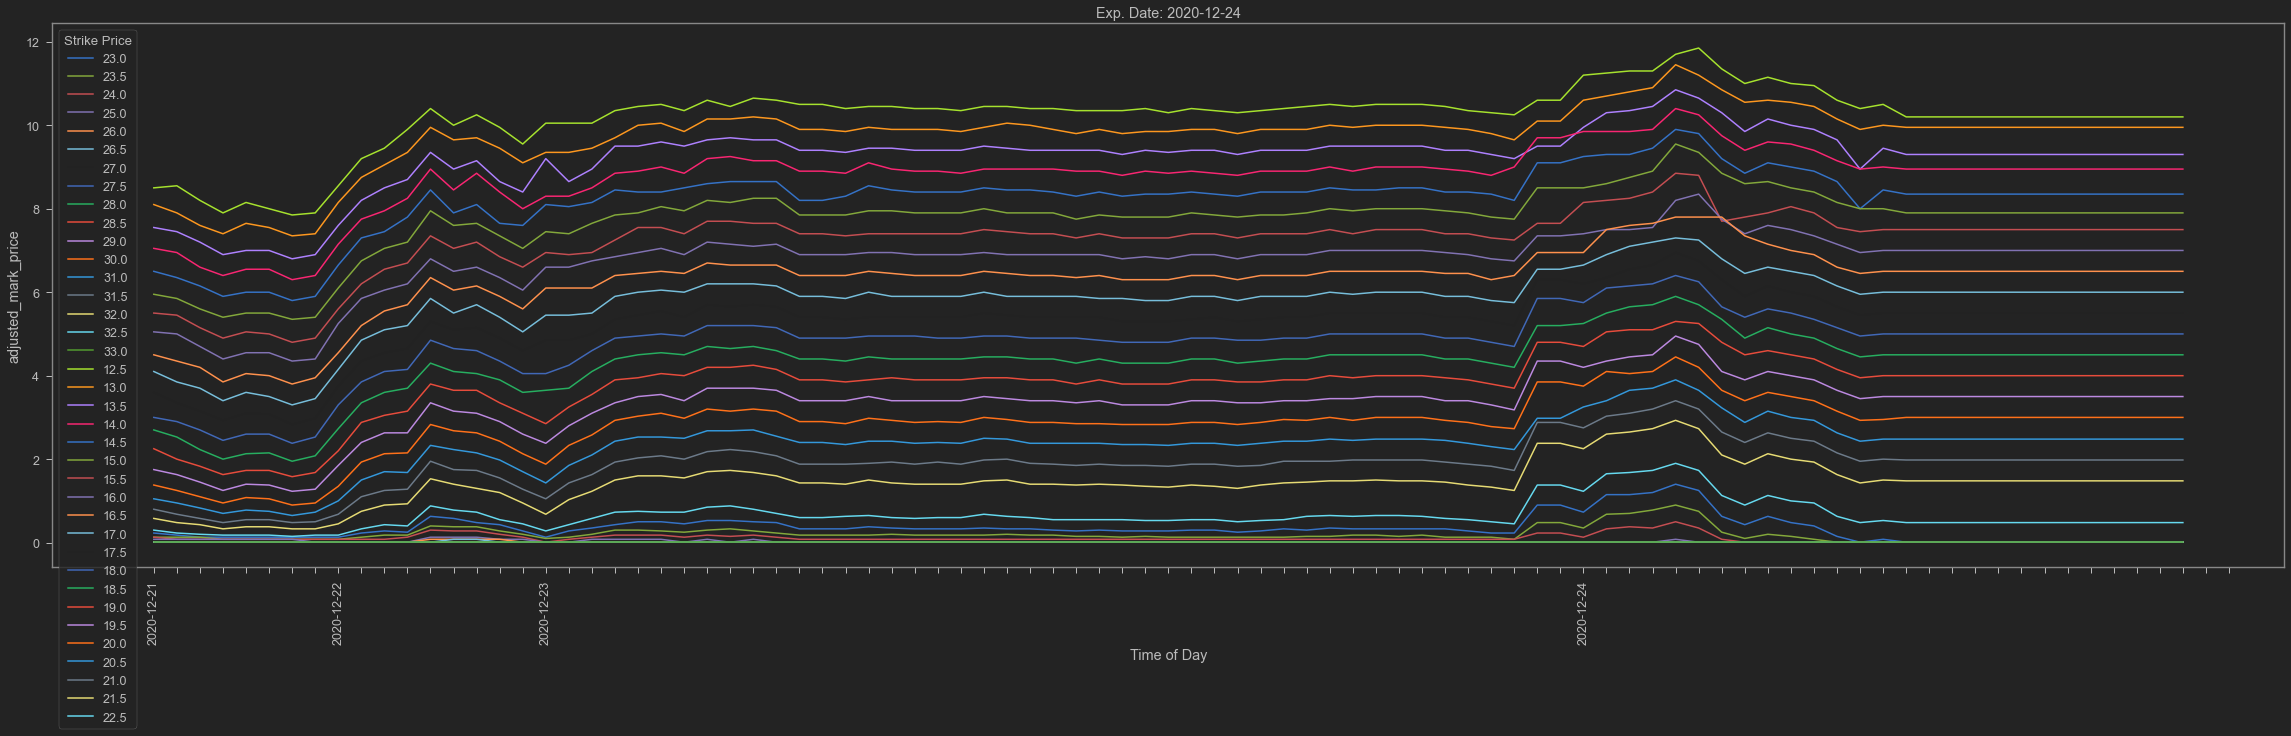

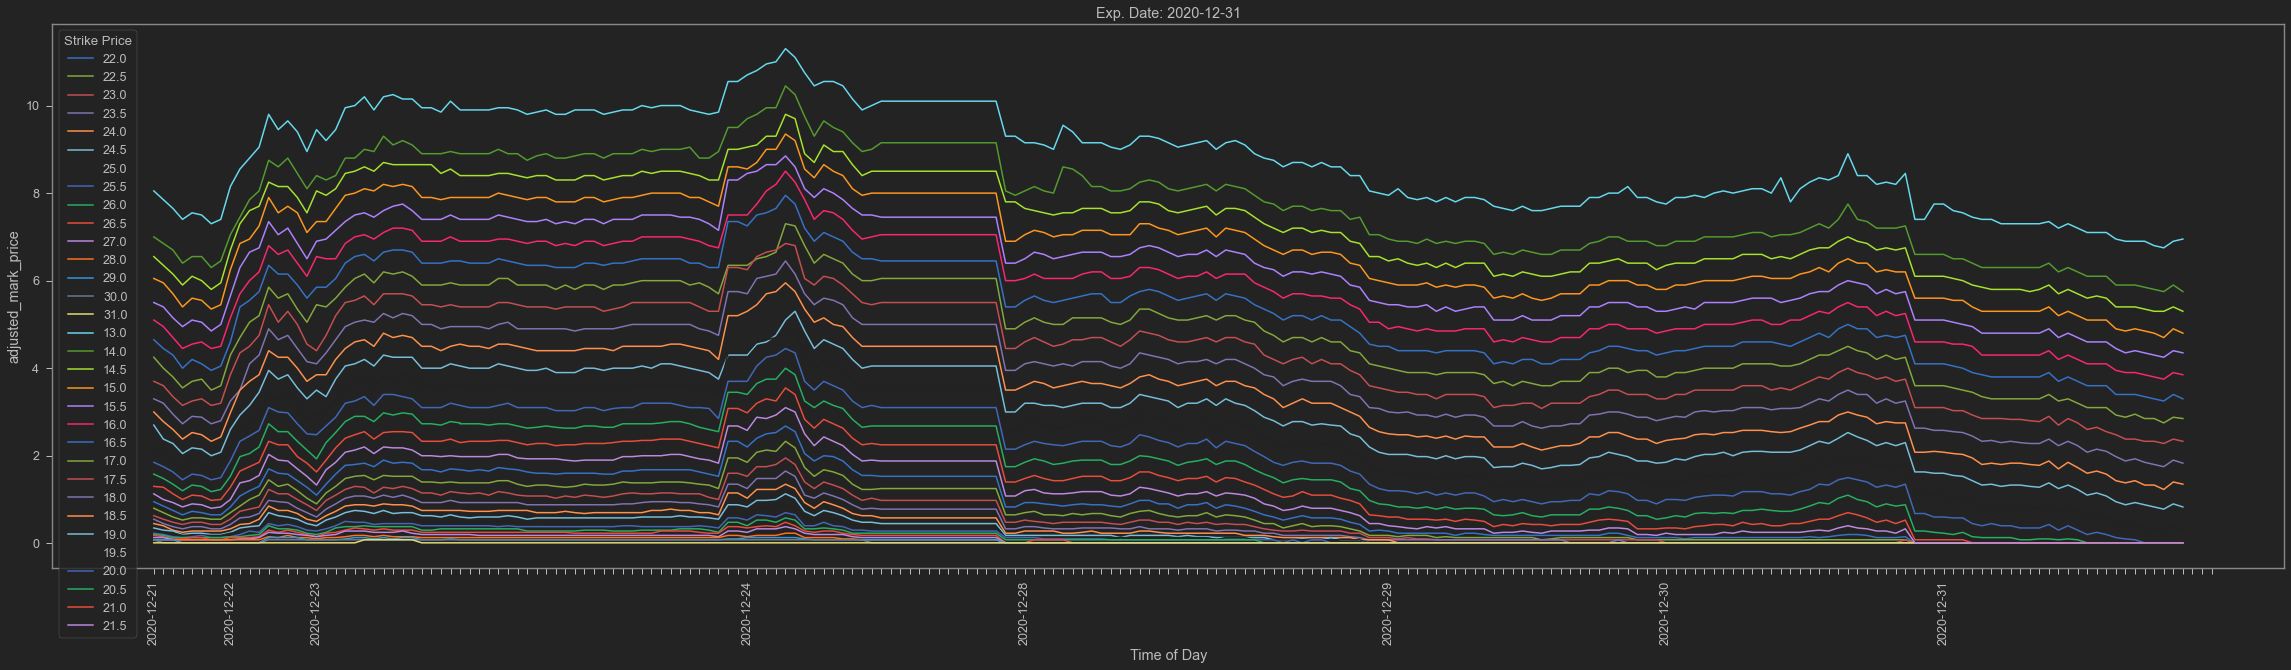

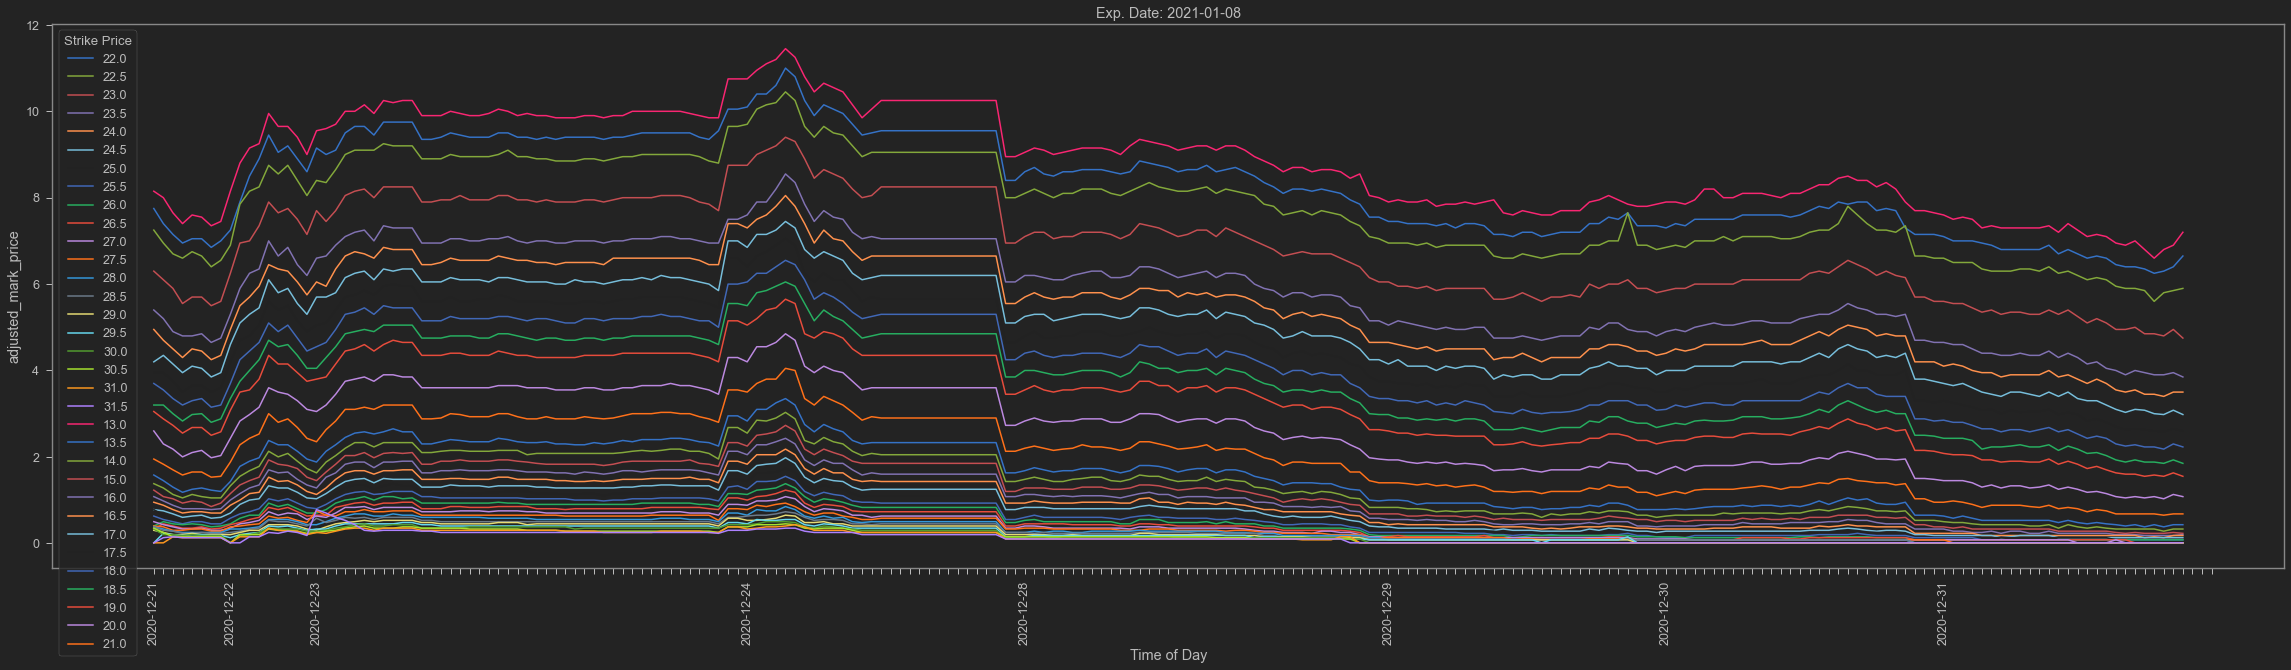

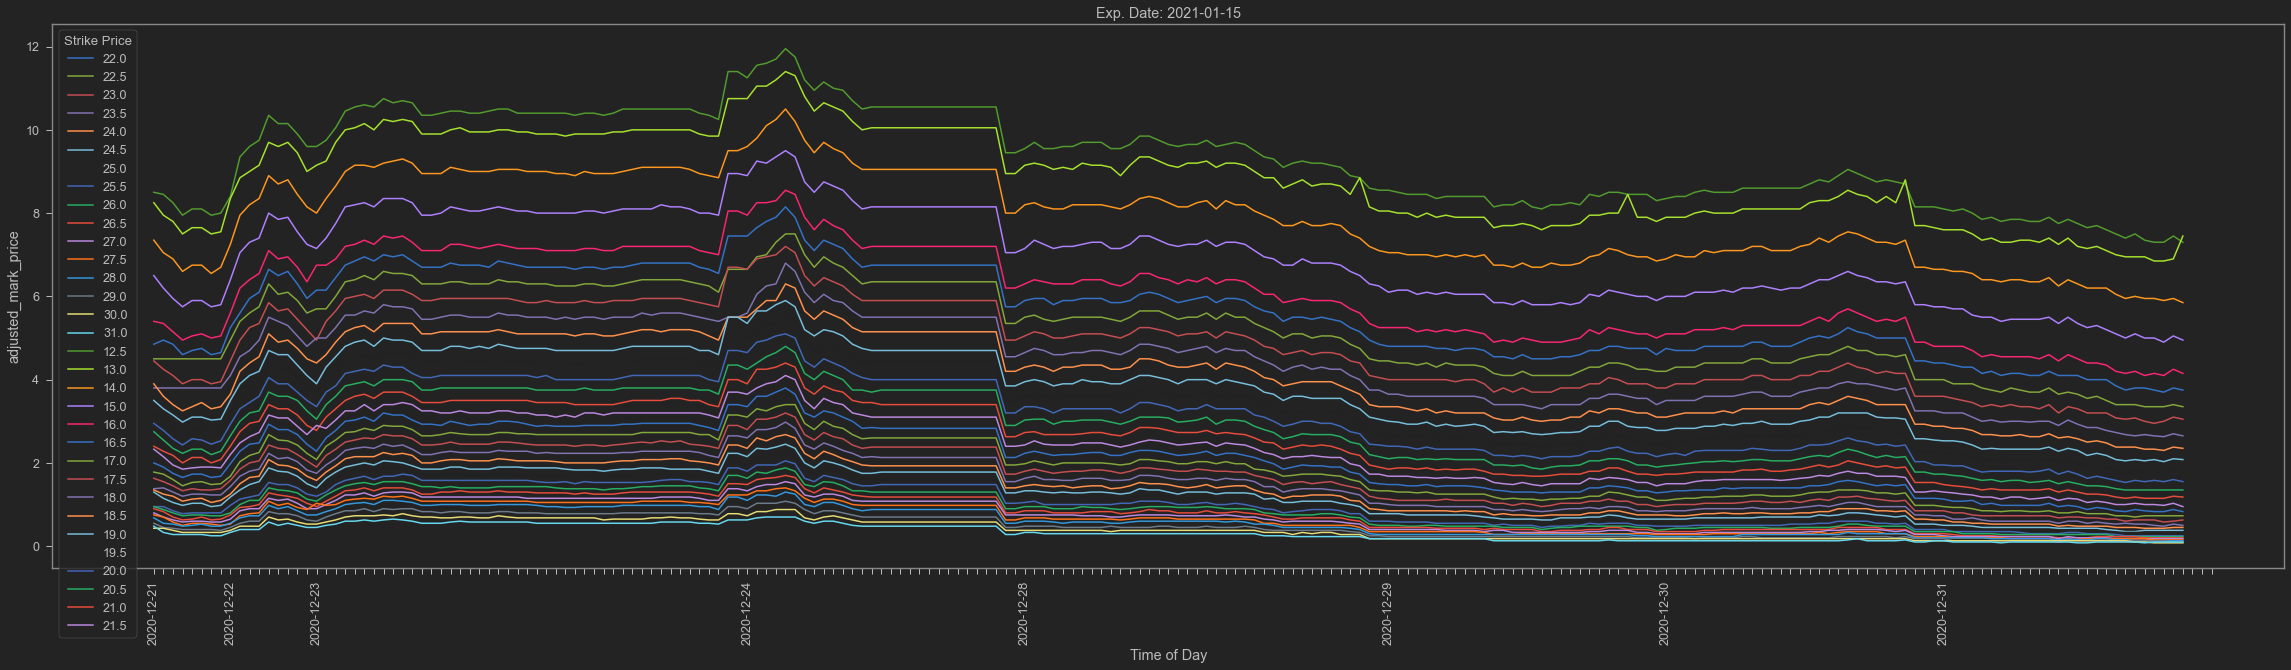

Reformatting time and feature for sp: 29.0
Reformatting time and feature for sp: 13.0


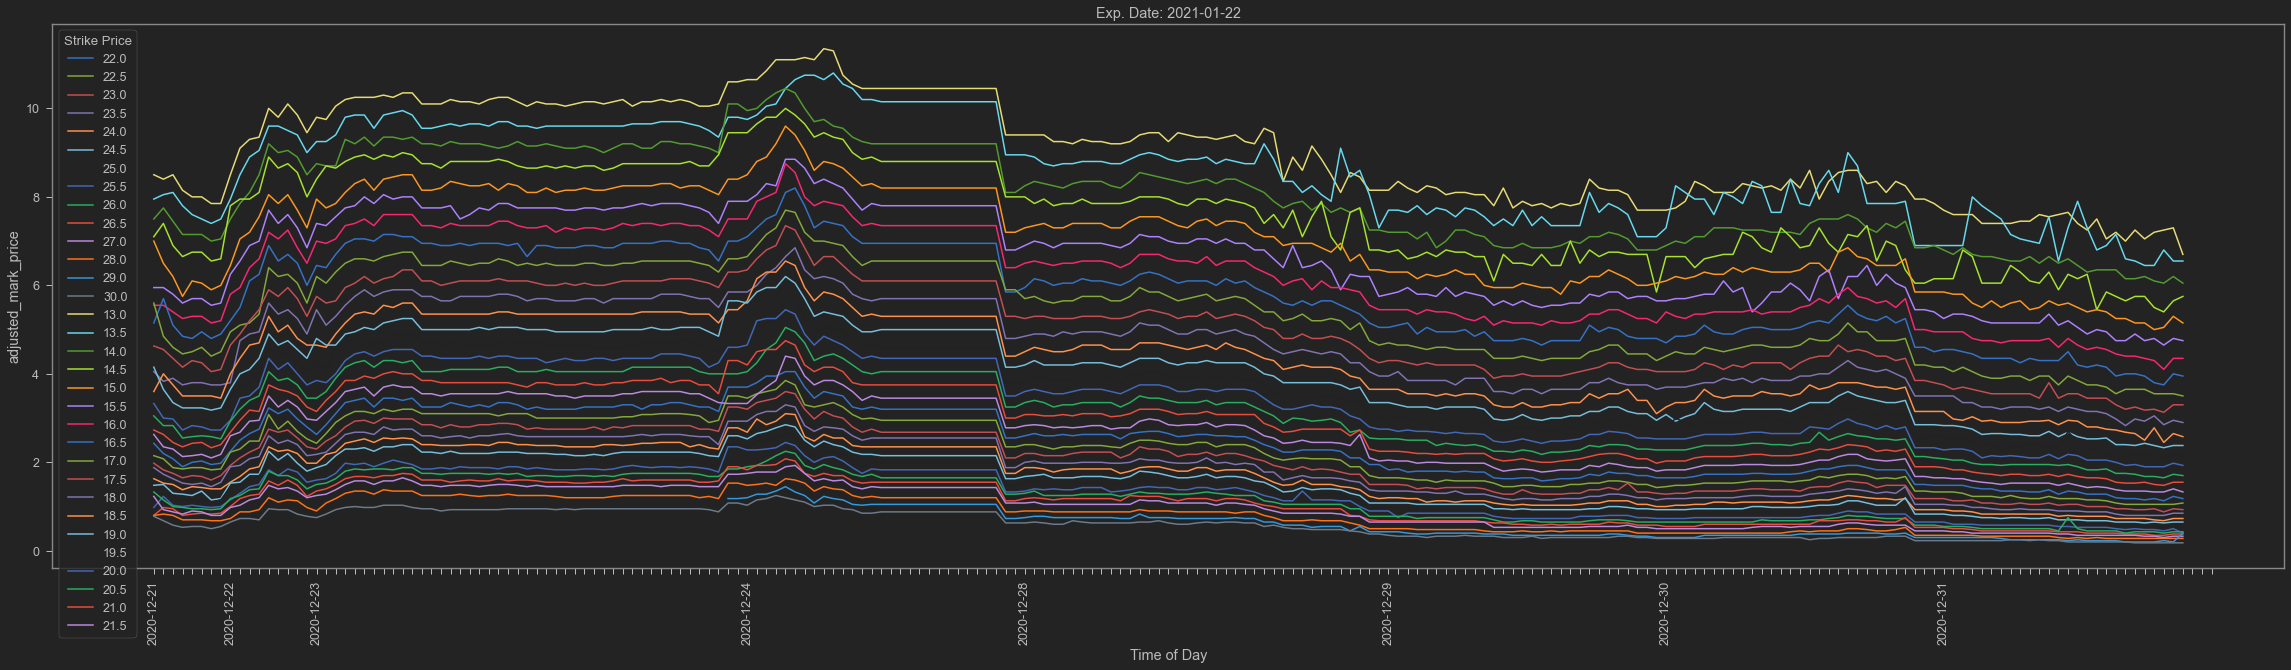

Reformatting time and feature for sp: 29.0
Reformatting time and feature for sp: 14.0


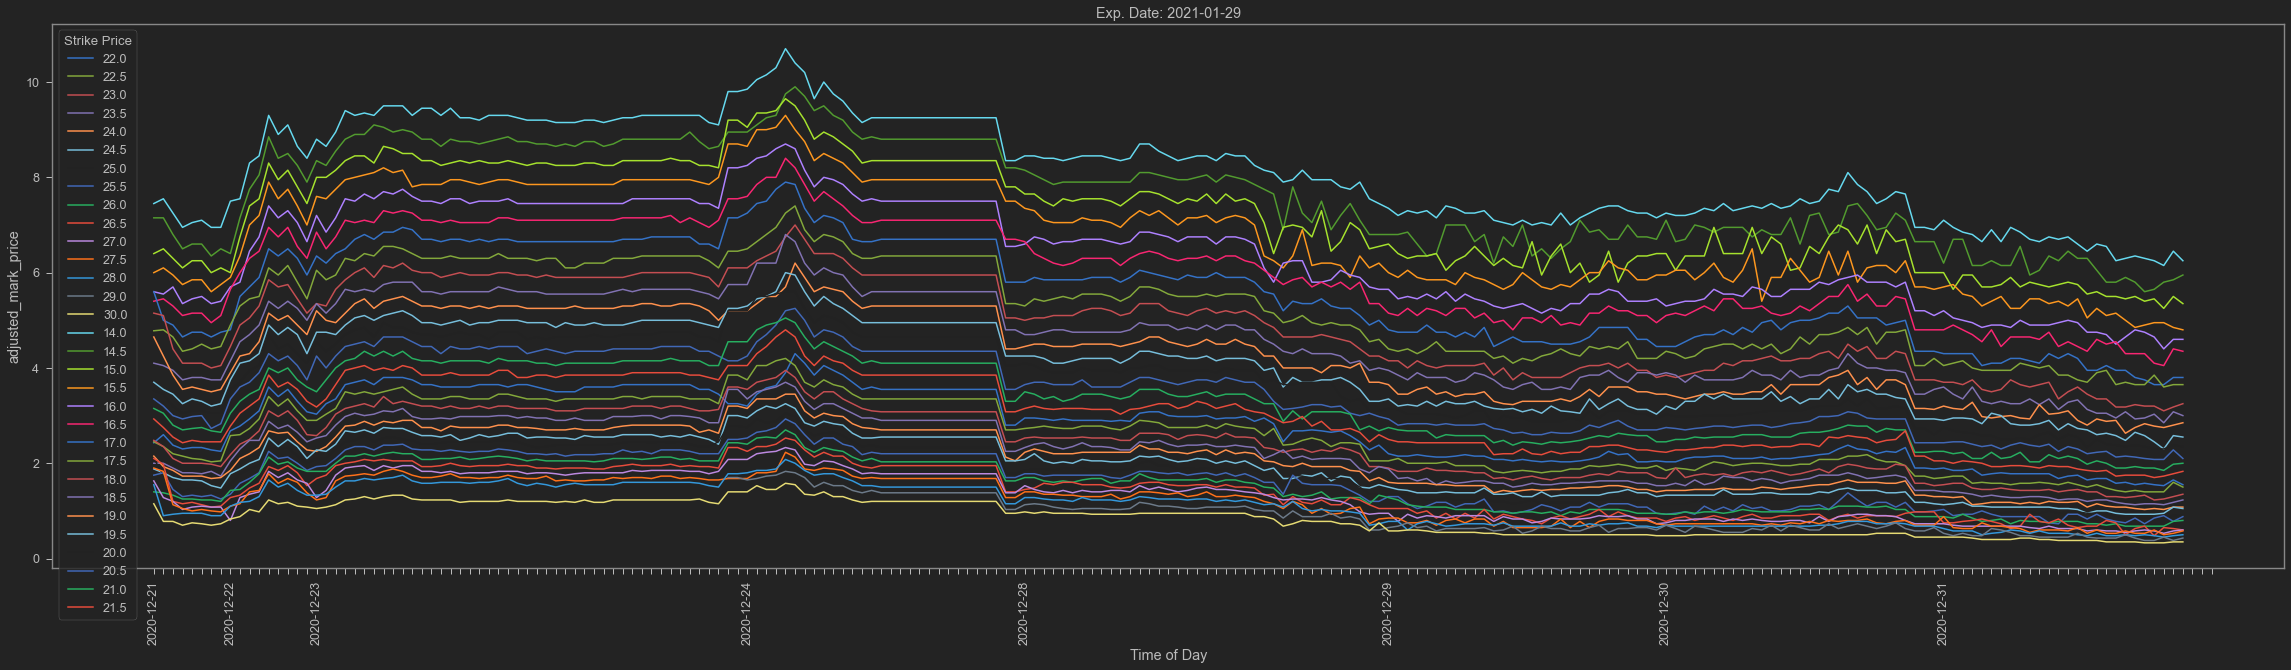

Reformatting time and feature for sp: 21.5
Reformatting time and feature for sp: 22.0
Reformatting time and feature for sp: 22.5
Reformatting time and feature for sp: 23.0
Reformatting time and feature for sp: 23.5
Reformatting time and feature for sp: 24.0
Reformatting time and feature for sp: 24.5
Reformatting time and feature for sp: 25.0
Reformatting time and feature for sp: 25.5
Reformatting time and feature for sp: 26.0
Reformatting time and feature for sp: 26.5
Reformatting time and feature for sp: 27.0
Reformatting time and feature for sp: 27.5
Reformatting time and feature for sp: 28.0
Reformatting time and feature for sp: 28.5
Reformatting time and feature for sp: 29.0
Reformatting time and feature for sp: 29.5
Reformatting time and feature for sp: 30.0
Reformatting time and feature for sp: 15.0
Reformatting time and feature for sp: 16.0
Reformatting time and feature for sp: 16.5
Reformatting time and feature for sp: 17.0
Reformatting time and feature for sp: 17.5
Reformattin

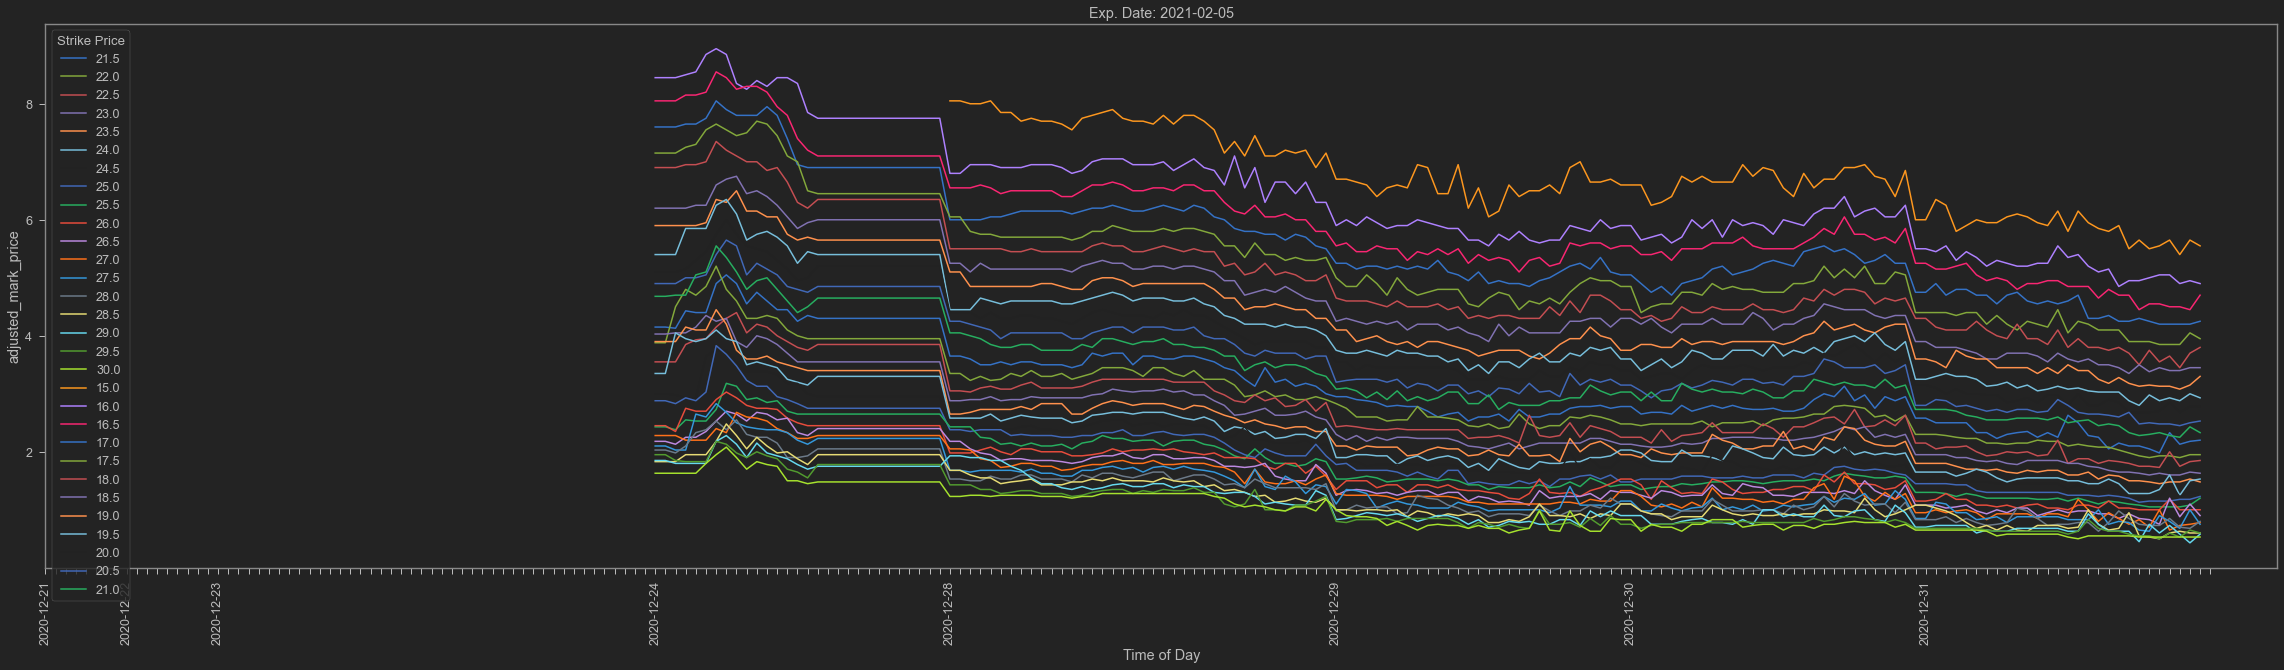

Reformatting time and feature for sp: 20.0
Reformatting time and feature for sp: 20.5
Reformatting time and feature for sp: 21.0
Reformatting time and feature for sp: 21.5
Reformatting time and feature for sp: 22.0
Reformatting time and feature for sp: 22.5
Reformatting time and feature for sp: 23.0
Reformatting time and feature for sp: 23.5
Reformatting time and feature for sp: 24.0
Reformatting time and feature for sp: 24.5
Reformatting time and feature for sp: 25.0
Reformatting time and feature for sp: 25.5
Reformatting time and feature for sp: 26.0
Reformatting time and feature for sp: 26.5
Reformatting time and feature for sp: 27.0
Reformatting time and feature for sp: 28.0
Reformatting time and feature for sp: 15.0
Reformatting time and feature for sp: 15.5
Reformatting time and feature for sp: 16.0
Reformatting time and feature for sp: 16.5
Reformatting time and feature for sp: 17.0
Reformatting time and feature for sp: 17.5
Reformatting time and feature for sp: 18.0
Reformattin

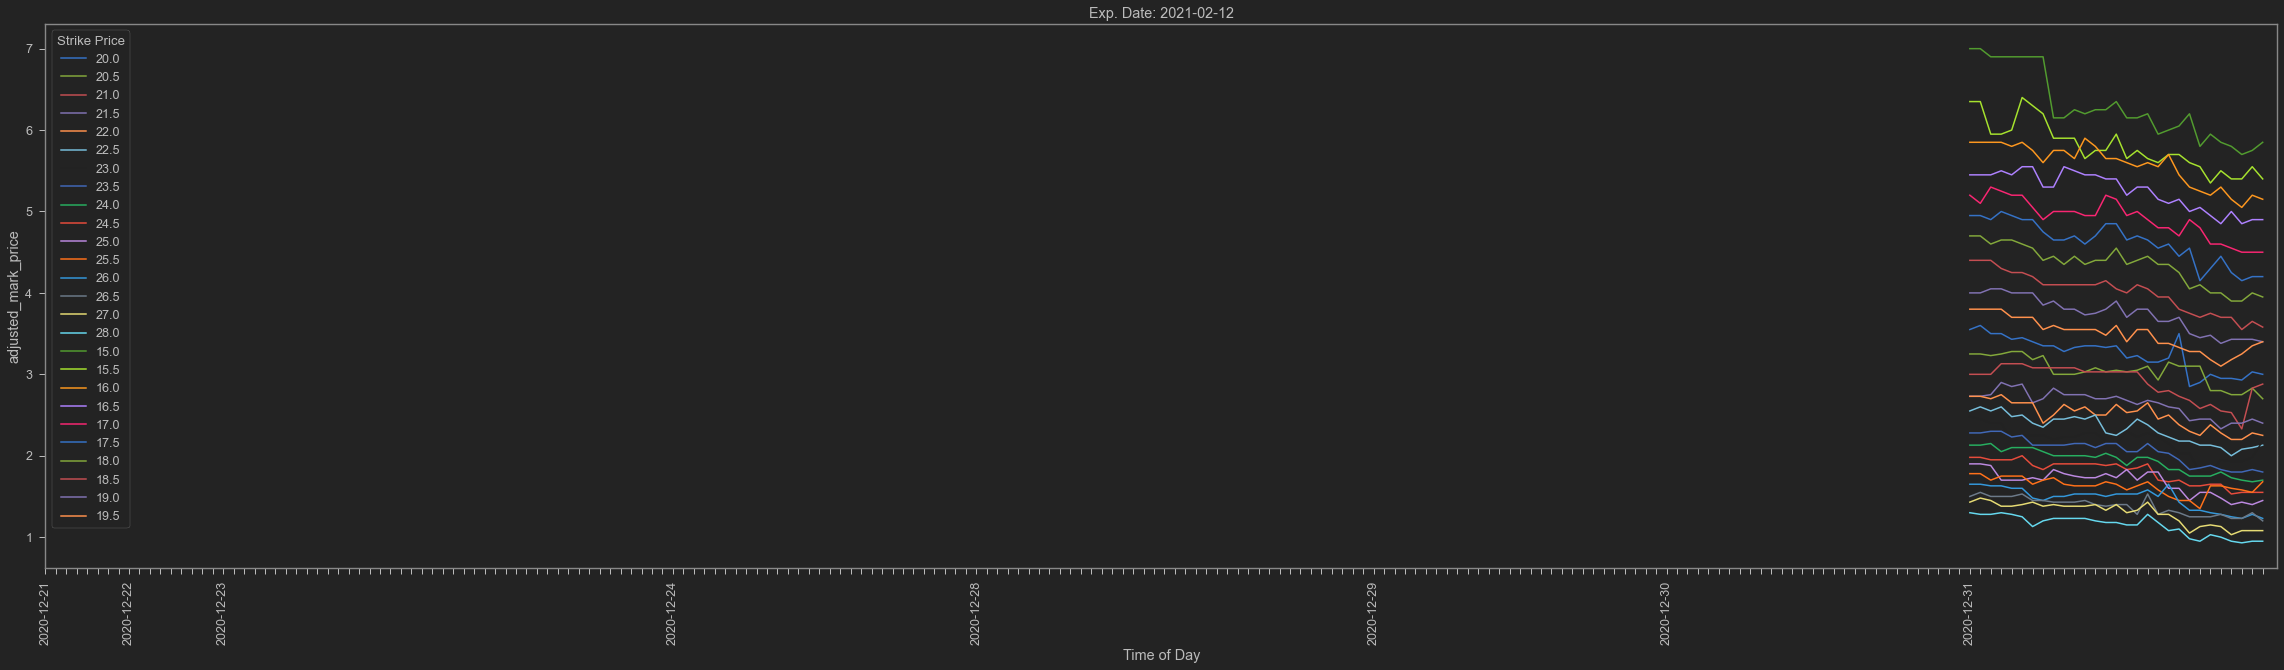

Reformatting time and feature for sp: 23.0
Reformatting time and feature for sp: 29.0
Reformatting time and feature for sp: 14.0
Reformatting time and feature for sp: 16.0


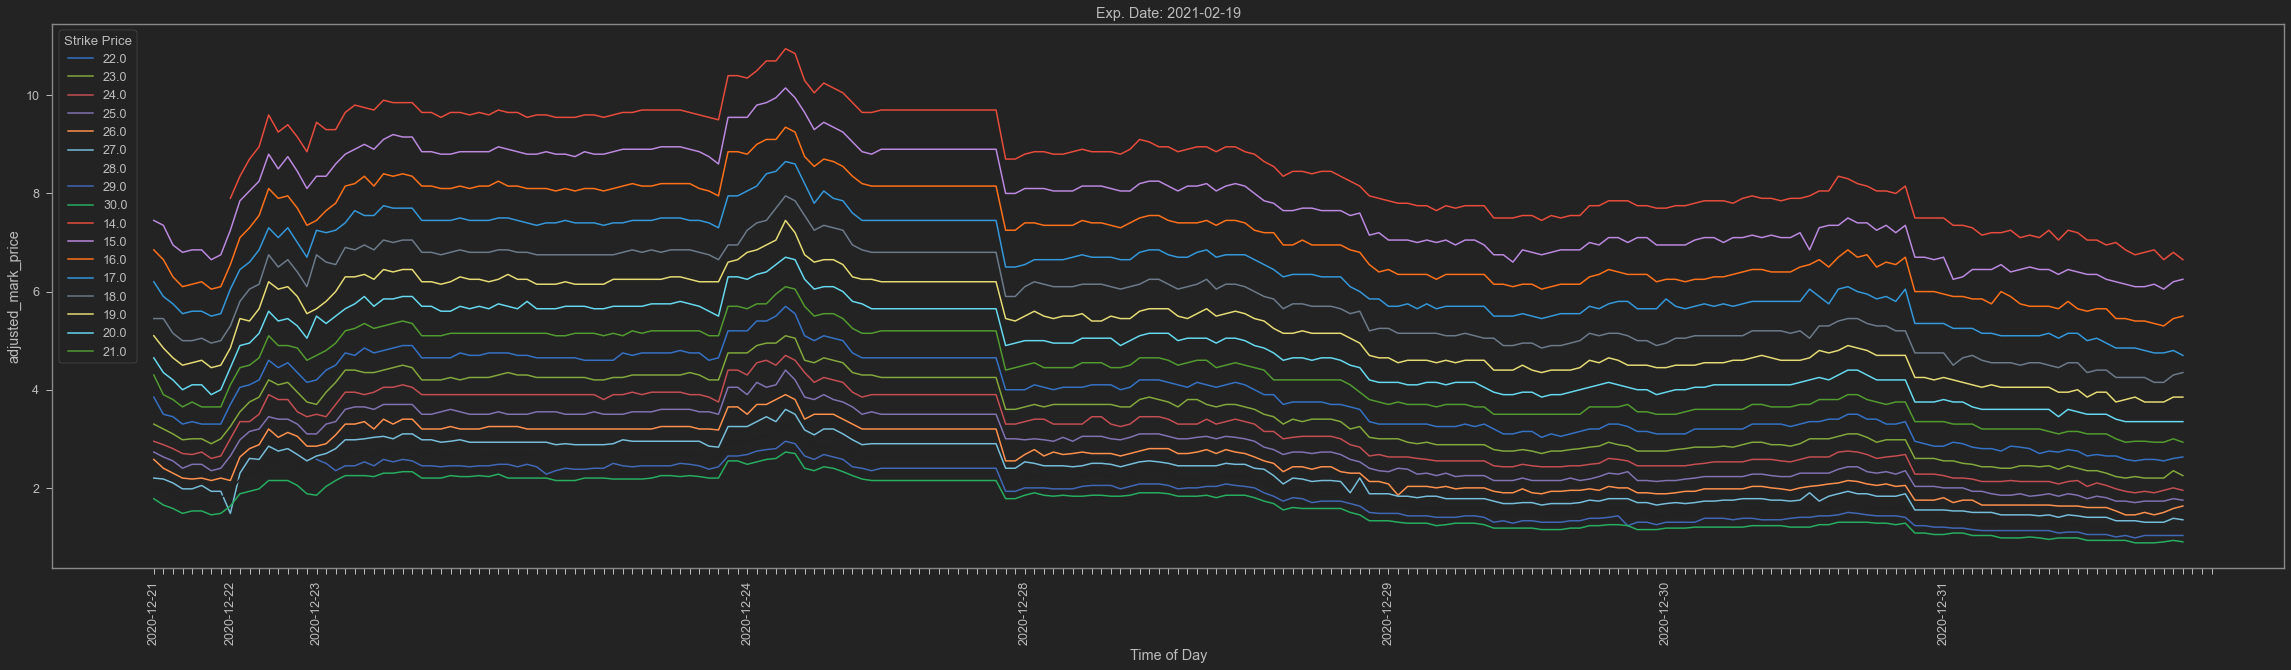

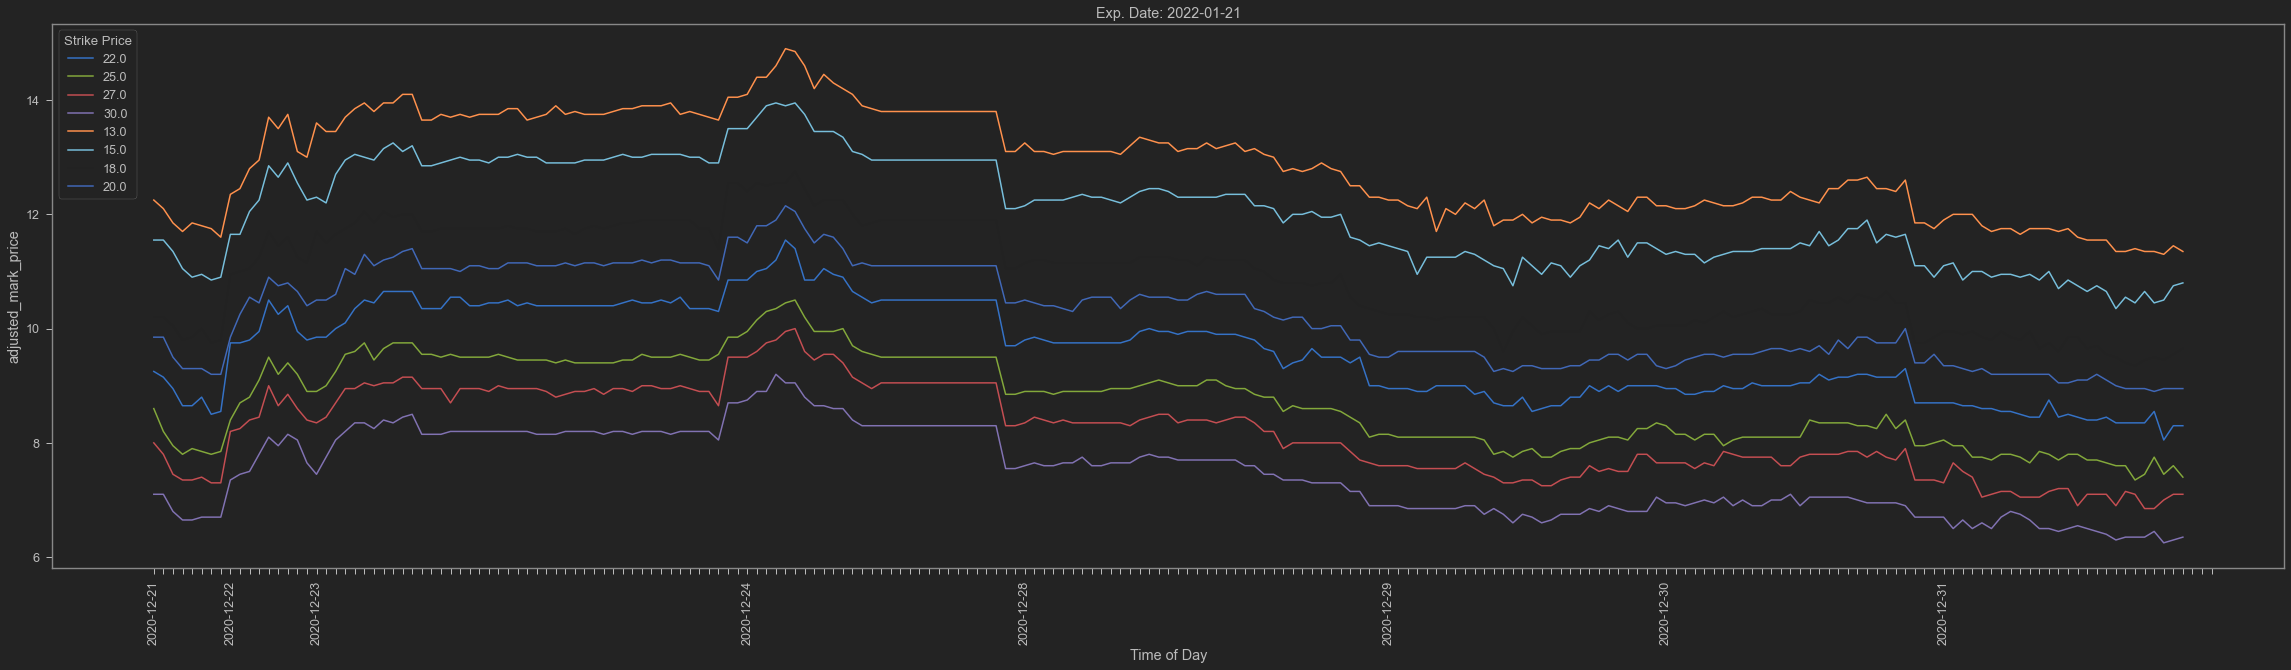

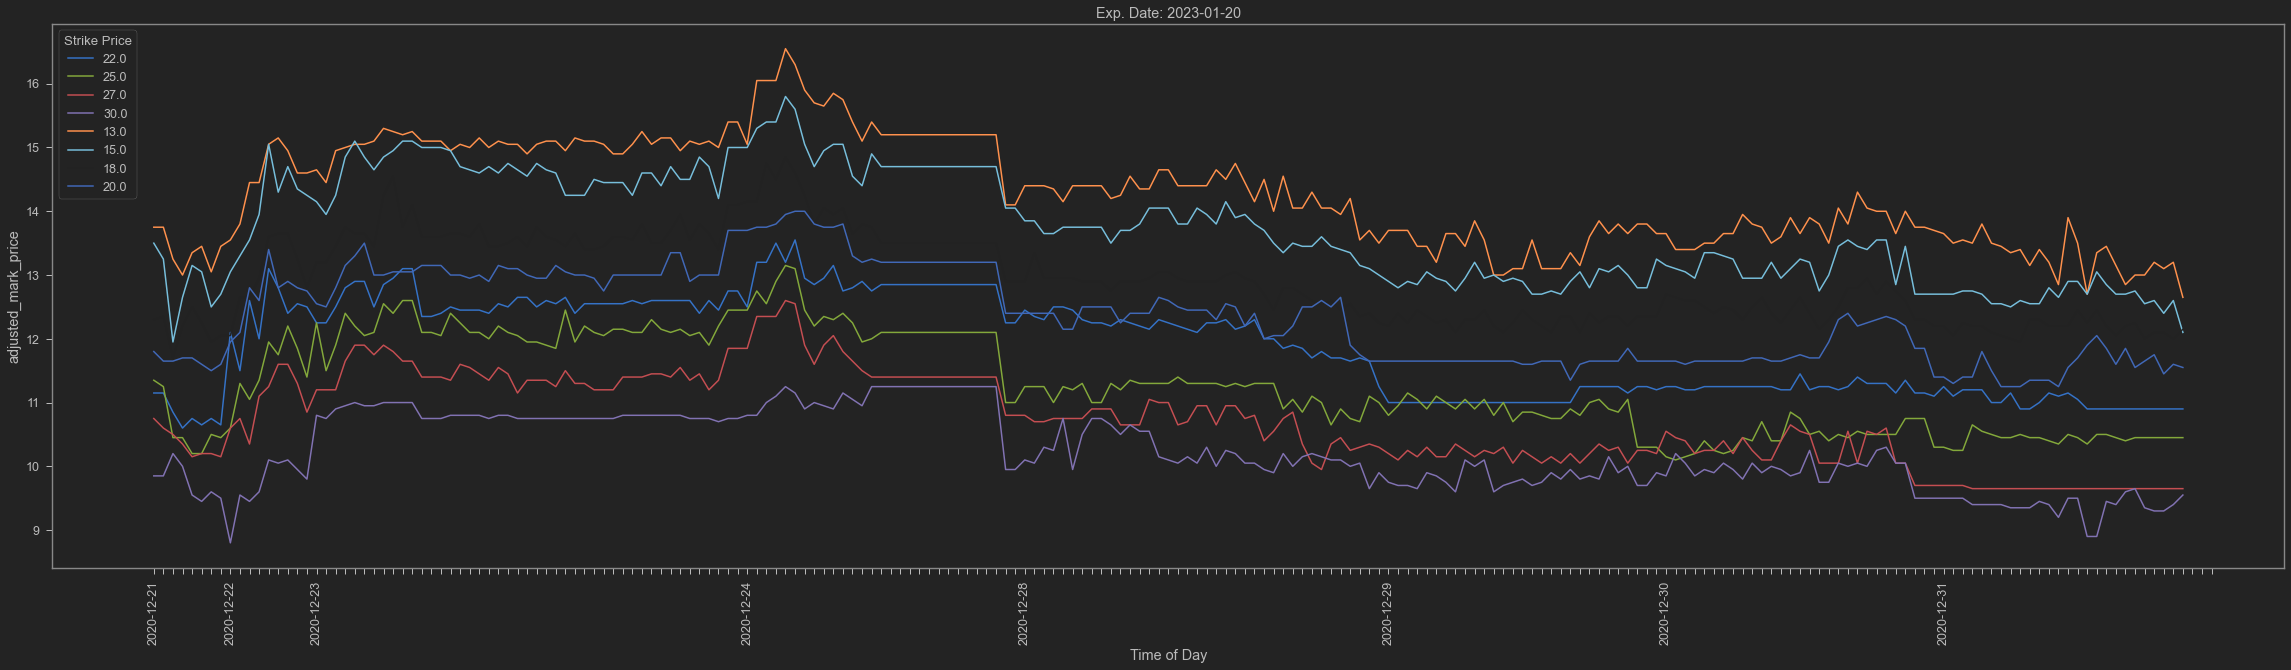

In [263]:
analysis(dataF = get_data('WKHS', columns), expD = [], strkR = .46, graph = True, y_axis = 'adjusted_mark_price', debug_data = False)

In [266]:
wkhs = get_data('WKHS', columns)

Loading data for WKHS
Expiration dates: 
 ['2020-12-24', '2020-12-31', '2021-01-08', '2021-01-15', '2021-01-22', '2021-01-29', '2021-02-05', '2021-02-12', '2021-02-19', '2022-01-21', '2023-01-20']


In [289]:
wkhs.sort_values(['strike_price'])

expiration_date            timestamp  last_trade_price  strike_price  \
0        2021-01-15  2020-12-23 13:20:30           22.8950           2.5   
96       2021-01-15  2020-12-23 10:07:33           22.6200           2.5   
265      2021-01-15  2020-12-24 12:30:56           22.9400           2.5   
158      2021-01-15  2020-12-22 09:37:08           21.2500           2.5   
33       2021-01-15  2020-12-30 12:35:51           21.1000           2.5   
..              ...                  ...               ...           ...   
208      2022-01-21  2020-12-28 12:00:23           22.1200          45.0   
145      2022-01-21  2020-12-29 12:30:52           20.5800          45.0   
200      2021-01-15  2020-12-28 12:00:23           22.1200          45.0   
276      2023-01-20  2020-12-31 14:15:57           19.9500          45.0   
73       2023-01-20  2020-12-29 15:00:52           20.8749          45.0   

     adjusted_mark_price  break_even_price  ask_price  ask_size  bid_price  \
0                  20.40             22.90       20.5        50       20.3   
96                 20.05             22.55       20.5        50       19.6   
265                20.40             22.90       20.8        50       20.0   
158                18.25             20.75       19.0        45       17.5   
33                 18.55             21.05       18.7        40       18.4   
..                   ...               ...        ...       ...        ...   
208                 5.00             50.00        5.1       282        4.9   
145                 4.20             49.20        4.4       669        4.0   
200                 0.01             45.01        0.1       913        0.0   
276                 6.45             51.45        6.6         1        6.3   
73                  7.15             52.15        7.4         1        6.9   

     bid_size  chance_of_profit_long  chance_of_profit_short  
0           1               0.333416                0.666584  
96        384                    NaN                     NaN  
265       310                    NaN                     NaN  
158        69                    NaN                     NaN  
33         35                    NaN                     NaN  
..        ...                    ...                     ...  
208         5               0.098392                0.901608  
145       352               0.089447                0.910553  
200         0               0.002582                0.997418  
276         8               0.084693                0.915307  
73          5               0.088024                0.911976  

[62736 rows x 12 columns]

In [326]:
new = wkhs.set_index(['expiration_date', 'strike_price', 'timestamp']).sort_index(0)
for exp in new.index.get_level_values(0).unique():
    for sp in new.loc[exp,:].index.get_level_values(0).unique():
        
        print(len(new.loc[(exp, sp), :]))

91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
91
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
58
58
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
154
216
125
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
154
216
125
125
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
15

In [323]:
 for sp in new.loc['2021-02-19',:].index.get_level_values(0).unique():
        print(len(new.loc[('2021-02-19', sp), :]))

208
216
216
216
216
216
216
216
216
216
216
216
216
216
216
199
216
125


In [322]:
new.loc[('2021-02-19', 14.0), :]

last_trade_price  adjusted_mark_price  break_even_price  \
timestamp                                                                      
2020-12-22 09:37:08           21.2500                 7.90             21.90   
2020-12-22 09:53:47           21.8400                 8.35             22.35   
2020-12-22 10:10:47           22.1014                 8.70             22.70   
2020-12-22 10:22:30           22.0900                 8.95             22.95   
2020-12-22 10:38:59           22.8300                 9.60             23.60   
2020-12-22 10:55:36           22.6799                 9.25             23.25   
2020-12-22 11:07:33           22.5500                 9.40             23.40   
2020-12-22 11:24:22           22.3801                 9.15             23.15   
2020-12-22 11:41:38           22.0800                 8.85             22.85   
2020-12-23 09:48:33           21.8531                 9.45             23.45   
2020-12-23 09:55:28           22.3150                 9.30             23.30   
2020-12-23 10:07:33           22.6200                 9.30             23.30   
2020-12-23 10:19:43           22.9480                 9.65             23.65   
2020-12-23 10:31:56           23.0521                 9.80             23.80   
2020-12-23 10:44:05           23.0300                 9.75             23.75   
2020-12-23 10:55:58           22.9700                 9.70             23.70   
2020-12-23 11:07:57           23.1500                 9.90             23.90   
2020-12-23 11:21:36           23.2300                 9.85             23.85   
2020-12-23 12:03:58           23.0947                 9.85             23.85   
2020-12-23 12:05:24           23.0500                 9.85             23.85   
2020-12-23 12:49:58           22.8002                 9.65             23.65   
2020-12-23 12:49:59           22.8002                 9.65             23.65   
2020-12-23 12:53:28           22.8500                 9.55             23.55   
2020-12-23 12:57:14           22.9600                 9.65             23.65   
2020-12-23 12:57:14           22.9600                 9.65             23.65   
2020-12-23 13:05:39           22.8600                 9.65             23.65   
2020-12-23 13:05:39           22.8600                 9.65             23.65   
2020-12-23 13:10:29           22.8700                 9.60             23.60   
2020-12-23 13:15:29           22.9100                 9.65             23.65   
2020-12-23 13:20:30           22.8950                 9.60             23.60   
2020-12-23 13:25:31           22.9400                 9.70             23.70   
2020-12-23 13:30:29           22.9400                 9.65             23.65   
2020-12-23 13:35:28           22.8700                 9.65             23.65   
2020-12-23 13:40:28           22.8000                 9.55             23.55   
2020-12-23 13:45:28           22.8500                 9.60             23.60   
2020-12-23 13:50:28           22.8850                 9.60             23.60   
2020-12-23 13:55:28           22.8100                 9.55             23.55   
2020-12-23 14:00:29           22.8100                 9.55             23.55   
2020-12-23 14:05:27           22.8899                 9.55             23.55   
2020-12-23 14:10:28           22.8800                 9.60             23.60   
2020-12-23 14:15:27           22.8600                 9.60             23.60   
2020-12-23 14:20:28           22.8300                 9.55             23.55   
2020-12-23 14:25:27           22.8600                 9.60             23.60   
2020-12-23 14:30:28           22.9650                 9.65             23.65   
2020-12-23 14:35:28           22.9600                 9.65             23.65   
2020-12-23 14:40:28           22.9600                 9.70             23.70   
2020-12-23 14:45:28           22.9700                 9.70             23.70   
2020-12-23 14:50:30           22.9900                 9.70             23.70   
2020-12-23 14:55:29  